# **Skin Cancer Detection using Resnet50V2 Architecture**
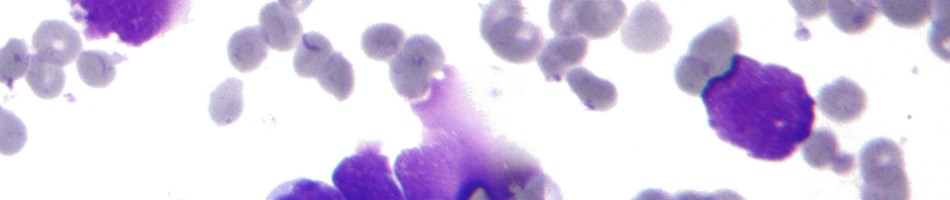
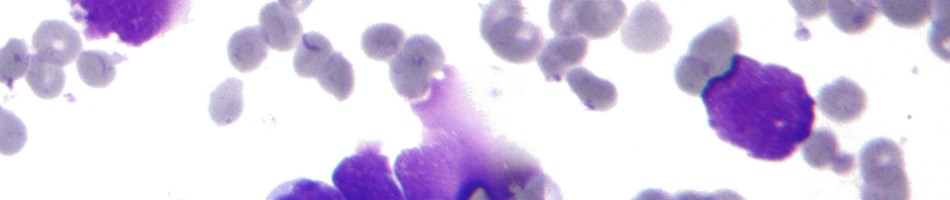

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.layers import Dropout
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm
import cv2
from glob import glob
import seaborn as sns
sns.set()

import sklearn
import skimage
from skimage.transform import resize

import random
from skimage.color import rgb2gray
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Getting the Dataset

In [3]:
train = "/content/drive/MyDrive/dataset/train"

test = "/content/drive/MyDrive/dataset/test"



LOAD_FROM_IMAGES = True

def get_data(folder):
    x = []
    y = []
    for folderName in os.listdir(folder):
        if not folderName.startswith("."):
            if folderName in ["benign"]:
                label = 0
            elif folderName in ["malignant"]:
                label = 1
            else:
                label = 2
            for image_filename in tqdm(os.listdir(folder +"/" +folderName+"/")):
                img_file = cv2.imread(folder + "/" +folderName + "/" + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file,(224,224,3), mode = "constant",anti_aliasing=True)
                    #img_file = rgb2gray(img_file)
                    img_arr = np.asarray(img_file)
                    x.append(img_arr)
                    y.append(label)
    x = np.asarray(x)
    y = np.asarray(y)
    return x,y

if LOAD_FROM_IMAGES:
    X_train,y_train = get_data(train)
    X_test, y_test = get_data(test)
    
    np.save("xtrain.npy",X_train)
    np.save("ytrain.npy",y_train)
    np.save("xtest.npy",X_test)
    np.save("ytest.npy",y_test)
else:
    X_train = np.load("xtrain.npy")
    y_train = np.load("ytrain.npy")
    X_test = np.load("xtest.npy")
    y_test = np.load("ytest.npy")

100%|██████████| 360/360 [01:57<00:00,  3.06it/s]


In [4]:
X_train=X_train.astype('float32')
y_train
X_test=X_test.astype('float32')
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

# **Getting some Benign Samples**

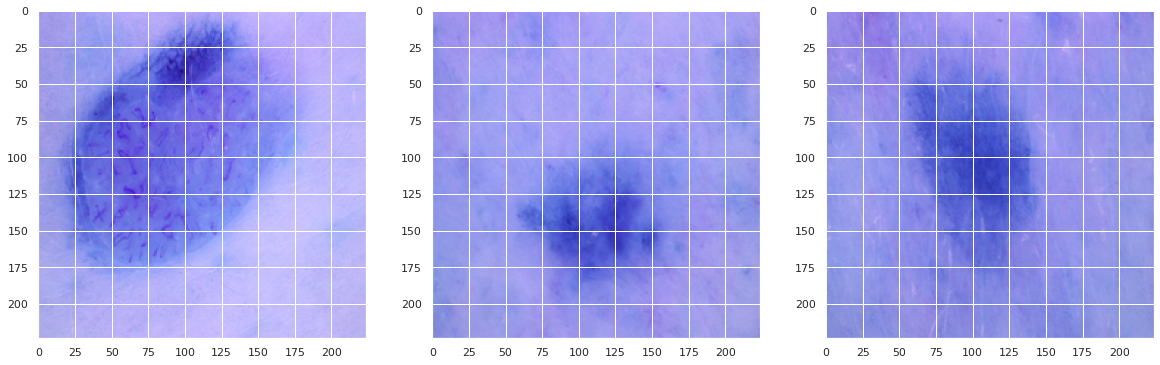

In [40]:
glob_img = glob("/content/drive/MyDrive/dataset/train/benign/**")

def plot(images):
    z = random.sample(images,3)
    plt.figure(figsize=(20,20))
    plt.subplot(131)
    plt.imshow(cv2.imread(z[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(z[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(z[2]))


plot(glob_img)
    

# **Getting some Malignant Samples**

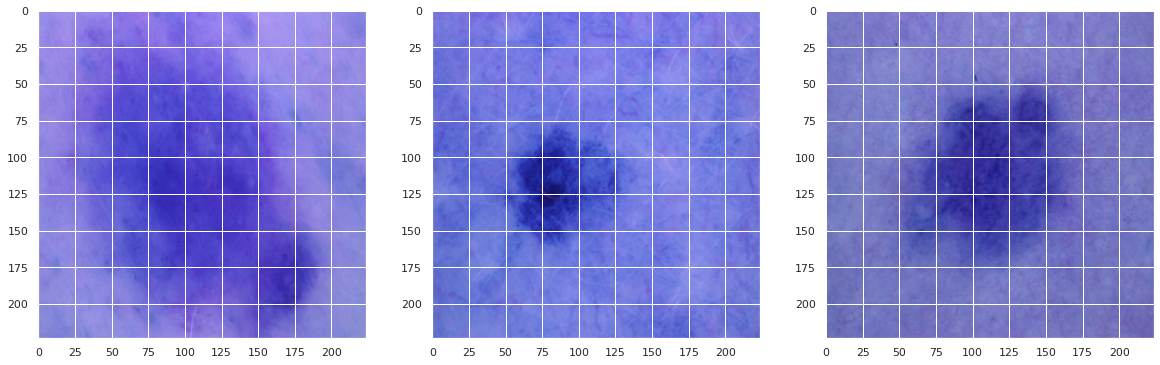

In [7]:
glob_img = glob("/content/drive/MyDrive/dataset/test/benign/**")

def plot(images):
    z = random.sample(images,3)
    plt.figure(figsize=(20,20))
    plt.subplot(131)
    plt.imshow(cv2.imread(z[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(z[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(z[2]))

plot(glob_img)

# **Benign and Malignant Count**

{0: 'benign', 1: 'malignant'}


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


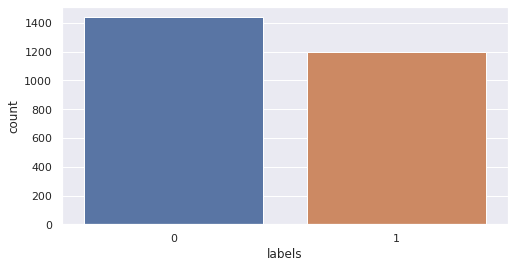

In [8]:
plt.figure(figsize=(8,4))

map_characters = {0:"benign",1:"malignant"}
dict_characters = map_characters

df = pd.DataFrame()
df["labels"]=y_train
lab = df["labels"]
dist=lab.value_counts()
sns.countplot(lab)
print(dict_characters)

# **Train Test Split**

In [10]:
X_train = X_train/255
X_test = X_test/255

X_train= X_train.reshape(len(X_train),224,224,3)
X_test= X_test.reshape(len(X_test),224,224,3)
y_train = np_utils.to_categorical(y_train, num_classes= 2)
y_test = np_utils.to_categorical(y_test, num_classes= 2)

# **ResNet50 Architecture**

In [11]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2

In [13]:
backbone = ResNet50V2(
    input_shape=(224, 224, 3),
    include_top=False
)

model = ResNet50V2(include_top=True,
                 weights= None,
                 input_tensor=None,
                 input_shape=input_shape,
                 pooling='max ',
                 classes=2)



# Compiling with ADAM optimizer

In [ ]:
model.compile(optimizer = "adam" ,
              loss = "binary_crossentropy", 
              metrics=["accuracy"])

In [25]:
history = model.fit(X_train, y_train, validation_split=0.2,
                    epochs=200, batch_size= 16, verbose=1 )

Epoch 1/100
132/132 [==============================] - 21s 157ms/step - loss: 0.0150 - accuracy: 0.9938 - val_loss: 1.1139 - val_accuracy: 0.7973
Epoch 2/100
132/132 [==============================] - 21s 158ms/step - loss: 0.0354 - accuracy: 0.9872 - val_loss: 2.0009 - val_accuracy: 0.6742
Epoch 3/100
132/132 [==============================] - 21s 159ms/step - loss: 0.0270 - accuracy: 0.9910 - val_loss: 1.1295 - val_accuracy: 0.7538
Epoch 4/100
132/132 [==============================] - 21s 160ms/step - loss: 0.0119 - accuracy: 0.9953 - val_loss: 2.1459 - val_accuracy: 0.6970
Epoch 5/100
132/132 [==============================] - 21s 161ms/step - loss: 0.0107 - accuracy: 0.9962 - val_loss: 8.0038 - val_accuracy: 0.4223
Epoch 6/100
132/132 [==============================] - 21s 162ms/step - loss: 0.0283 - accuracy: 0.9915 - val_loss: 9.1627 - val_accuracy: 0.2008
Epoch 7/100
132/132 [==============================] - 22s 163ms/step - loss: 0.0173 - accuracy: 0.9943 - val_loss: 1.3234 -

# **Accuracy**

In [38]:
score = model.evaluate(X_test_R, y_test, batch_size=batch_size, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

42/42 [==============================] - 2s 46ms/step - loss: 1.2216 - accuracy: 0.7955
Test loss: 1.2216304540634155
Test accuracy: 0.8004545617103577


# **This Model can Successfully Detect Benign or Malignant Cell of Skin with an Accuracy of 80%**